In [71]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsRegressor
import random
import numpy as np
import numpy.matlib
import sklearn.svm
import weatherdata
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, linear_model
from sklearn.model_selection import ShuffleSplit

In [34]:
# loading separate datasets
traindataset = pd.read_csv('csv/train_updated.csv')
mensdataset = read_csv('csv/mens_clothing.csv')
womensdataset = read_csv('csv/womens_clothing.csv')
othersdataset = read_csv('csv/other_clothing.csv')
traindataset['ProductCategory'] = 'all Clothing'
#del mensdataset['ProductCategory']
traindataset.head()

#othersdataset.head()

,Year,Month,Sales(In ThousandDollars),ProductCategory
0,2009,1,3215.0,all Clothing
1,2009,2,3084.0,all Clothing
2,2009,3,3719.0,all Clothing
3,2009,4,4245.0,all Clothing
4,2009,5,4371.0,all Clothing


In [35]:
#print(traindataset.shape)
#traindataset = traindataset[pd.notnull(traindataset['Sales(In ThousandDollars)'])]
#print(traindataset.shape)

In [36]:
#print(mensdataset.shape)
mensdataset = mensdataset[pd.notnull(mensdataset['Sales(In ThousandDollars)'])]
womensdataset = womensdataset[pd.notnull(womensdataset['Sales(In ThousandDollars)'])]
othersdataset = othersdataset[pd.notnull(othersdataset['Sales(In ThousandDollars)'])]
#print(mensdataset.shape)

In [37]:
mensGrp = womensdataset.groupby(['Year'])
#mensGrp.plot()
#plt.show

In [38]:
mensGrp = womensdataset.groupby(['Year'])
#mensGrp.plot()
#train_sales = pd.read_csv('csv/train_updated.csv')
#trainGrp = train_sales.groupby('Year')
#trainGrp.plot()
#plt.show()

In [39]:
#othersGrp = othersdataset.groupby(['Year'])
#othersGrp.plot()
#plt.show()

In [40]:
'''
plt.subplot(311)
plt.plot( mensdataset['Sales(In ThousandDollars)'], 'b.')

plt.subplot(312)
plt.plot( womensdataset['Sales(In ThousandDollars)'], 'b.')

plt.subplot(313)
plt.plot( othersdataset['Sales(In ThousandDollars)'], 'b.')
'''

"\nplt.subplot(311)\nplt.plot( mensdataset['Sales(In ThousandDollars)'], 'b.')\n\nplt.subplot(312)\nplt.plot( womensdataset['Sales(In ThousandDollars)'], 'b.')\n\nplt.subplot(313)\nplt.plot( othersdataset['Sales(In ThousandDollars)'], 'b.')\n"

In [41]:
scale = StandardScaler()
#pca = PCA()

#menScale = StandardScaler()
#womenScale = StandardScaler()
#othersScale = StandardScaler()
#traindataset = pd.read_csv('csv/train_updated.csv')

In [42]:
df1 = pd.read_csv("csv/mens_clothing.csv", sep=",")
df2 = pd.read_csv("csv/weatherdata_final.csv", sep=",")
result = pd.merge(df1, df2, on=['Year','Month'], how='inner')
#result

In [116]:
# preprocessing data
def preprocess(dataset,isTest, cate):
    dropcolumns = ['ProductCategory','PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)']
    macrodataset = read_csv('csv/train_macro.csv')
    weatherdataset = read_csv('csv/weatherdata_final.csv')
    eventdays = read_csv('csv/eventdays.csv')
    result = pd.merge(dataset, weatherdataset, on=['Year','Month'], how='inner')
    result = pd.merge(result, eventdays, on=['Year','Month'], how='inner')
    result.fillna(0)
    frames = [result, macrodataset]
    traindataset = pd.concat(frames,axis=1)
    traindataset = traindataset.drop(dropcolumns,axis=1)
    traindataset.fillna(0, inplace=True)
    datavalues = traindataset.values
    xvalues = datavalues[:,3:]
    yvalues = datavalues[:,2]
    if(cate == 'men'):
        xvalues = scale.fit_transform(xvalues)
    elif(cate == 'women'):
        xvalues = scale.fit_transform(xvalues)
    else:
        xvalues = scale.fit_transform(xvalues)
    #print(xvalues.shape)
    #
    #xvalues = pca.fit_transform(xvalues)
    return train_test_split(xvalues, yvalues, test_size=0.2, random_state=100)
       


In [117]:
def cosssValidationpreprocess(dataset,isTest, cate):
    dropcolumns = ['ProductCategory','PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)']
    macrodataset = read_csv('csv/train_macro.csv')
    weatherdataset = read_csv('csv/weatherdata_final.csv')
    result = pd.merge(dataset, weatherdataset, on=['Year','Month'], how='right')
    frames = [result, macrodataset]
    traindataset = pd.concat(frames,axis=1)
    traindataset = traindataset.drop(dropcolumns,axis=1)
    traindataset.fillna(0, inplace=True)
    datavalues = traindataset.values
    xvalues = datavalues[:,3:]
    yvalues = datavalues[:,2]
    if(cate == 'men'):
        xvalues = scale.fit_transform(xvalues)
    elif(cate == 'women'):
        xvalues = scale.fit_transform(xvalues)
    else:
        xvalues = scale.fit_transform(xvalues)
    #print(xvalues.shape)
    #
    #xvalues = pca.fit_transform(xvalues)
    return xvalues, yvalues
     

In [118]:
# models
def trainModel(x_train, y_train):    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    return regr

def knnModel(x_train,y_train, k):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(x_train, y_train)
    return neigh

def svrModel(x_train,y_train):
    tuned_model = sklearn.svm.SVR(kernel = 'linear',C=1)
    tuned_model.fit(x_train, y_train)
    return tuned_model

def ridgeMode(x_train,y_train):
    clf = Ridge(alpha=1.0)
    clf.fit(x_train, y_train) 
    return clf


In [119]:
def drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict ):
    plt.figure()
    plt.subplot(311)
    plt.plot(meny_test,  color='black')
    plt.plot(men_predict, color='blue')
    plt.title('mens prediction')
    
    plt.subplot(312)
    plt.plot(womeny_test,  color='black')
    plt.plot(women_predict, color='blue')
    plt.title('womens prediction')
    
    plt.subplot(313)
    plt.plot(othersy_test,  color='black')
    plt.plot(other_predict, color='blue')
    plt.title('others prediction')
    plt.show()

In [120]:
isTest = False
#menx_train, menx_test, meny_train, meny_test =  preprocess(mensdataset, isTest, 'men')
#womenx_train, womenx_test, womeny_train, womeny_test =  preprocess(womensdataset,isTest, 'women' )
#othersx_train, othersx_test, othersy_train, othersy_test =  preprocess(othersdataset, isTest, 'others')

x_train, x_test, y_train, y_test =  preprocess(traindataset, isTest, 'others')
#menx_train = menScale.fit_transform(menx_train)
#menx_test = menScale.transform(menx_test)
#womenx_train = womenScale.fit_transform(womenx_train)
#womenx_test = womenScale.transform(womenx_test)
#othersx_train = othersScale.fit_transform(othersx_train)
#othersx_test = othersScale.transform(othersx_test)


#menx_train.shape,menx_test.shape,meny_train.shape,meny_test.shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((57, 24), (15, 24), (57,), (15,))

men_rmse: 966.323


Text(0.5,1,'prediction')

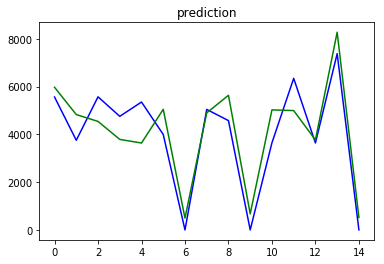

In [121]:
# checking with ridge regression model

param_grid = [
  {'alpha': [1, 10, 100, 1000], 'max_iter': [10000, 100000, 50000]},
 ]

menclf = Ridge(alpha=1.0)
menregr = GridSearchCV(menclf,param_grid)
menregr.fit(x_train,y_train) 

y_predict = menregr.predict(x_test)
men_rmse = math.sqrt(mean_squared_error(y_predict, y_test))
print('men_rmse: %.3f' % men_rmse)

plt.plot(y_test,   'b')
plt.plot(y_predict, 'g')
plt.title('prediction')

#regr = ridgeMode(x_train,y_train)
#womenregr = ridgeMode(womenx_train,womeny_train)
#othersregr = ridgeMode(othersx_train, othersy_train)

#women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
#other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))



#drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

men_rmse: 2029.194


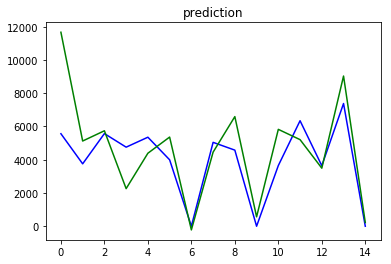

In [122]:
# linear mode
menregr = trainModel(x_train,y_train)
y_predict = menregr.predict(x_test)
men_rmse = math.sqrt(mean_squared_error(y_predict, y_test))
print('men_rmse: %.3f' % men_rmse)

plt.plot(y_test,   'b')
plt.plot(y_predict, 'g')
plt.title('prediction')
plt.show()


men_rmse: 2205.903


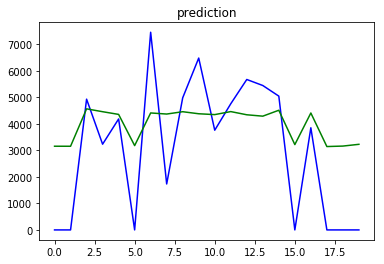

In [102]:
# checking with svr model
menregr = svrModel(x_train,y_train)
y_predict = menregr.predict(x_test)
men_rmse = math.sqrt(mean_squared_error(y_predict, y_test))
print('men_rmse: %.3f' % men_rmse)

plt.plot(y_test,   'b')
plt.plot(y_predict, 'g')
plt.title('prediction')
plt.show()

In [103]:
# k-nn model
s = 9999999
best_k = 0
for epoch in range(1,20):
    k = random.randint(1,10)
    #k = epoch
    #print(k)
    menregr = knnModel(x_train,y_train,k)

    y_predict = menregr.predict(x_test)
    men_rmse = math.sqrt(mean_squared_error(y_predict, y_test))
    ss = men_rmse
    
    if(ss < s):
        best_k = k
        s = ss
    #print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)
    

print(best_k)


5


men_rmse: 1086.615


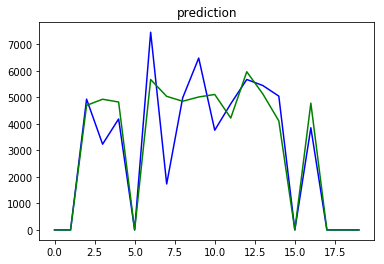

In [104]:
#best_k = 8


menregr = knnModel(x_train,y_train,best_k)
y_predict = menregr.predict(x_test)
men_rmse = math.sqrt(mean_squared_error(y_predict, y_test))
print('men_rmse: %.3f' % men_rmse)

plt.plot(y_test,   'b')
plt.plot(y_predict, 'g')
plt.title('prediction')
plt.show()

In [81]:
# cross validation
from sklearn.model_selection import LeaveOneOut
x_train, y_train = cosssValidationpreprocess(traindataset, isTest, 'others')
#regr = linear_model.LinearRegression()
loo = LeaveOneOut((len(y_train)))
regr = KNeighborsRegressor(n_neighbors=4)
#cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=100)
scores = cross_validation.cross_val_score(regr, x_train, y_train, scoring='neg_mean_squared_error', cv=loo)
print(scores)


TypeError: __init__() takes 1 positional argument but 2 were given

In [52]:
testdata = pd.read_csv('csv/test_data.csv')
testMacroData = pd.read_csv('csv/test_macro.csv')
weather = pd.read_csv("csv/weatherdata_final.csv", sep=",")
result = pd.merge(testdata, weather, on=['Year','Month'], how='inner')
del result['Sales(In ThousandDollars)']
#result

In [53]:
# repeating macro business data for 3 categories
def preprocessTestMacroData(testMacroData):
    dropcolumns = ['PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)', 'Year','Month','Year-Month']
    testMacroData = testMacroData.drop(dropcolumns,axis=1)

    testMacroData.fillna(0)
    finalData = np.zeros((3*testMacroData.values.shape[0],testMacroData.values.shape[1]),dtype = object)
    for i,row in enumerate(testMacroData.values):    
        x =  np.array(row)
        x = np.matlib.repmat(x,3,1)
        finalData[i*3:3*i+3] = x
    changed = pd.DataFrame(finalData, columns = testMacroData.columns)
    return changed

In [54]:
test_macro = preprocessTestMacroData(testMacroData)
frames = [result, test_macro]
testdataset = pd.concat(frames,axis=1)
#testdataset

In [109]:
mensdata = []
womensdata = []
othersdata = []
data = testdataset.values
#ata = scale.transform(data)
for row in data:
    #if row[2] == 'WomenClothing':
    #    womensdata.append(row[3:])
    #elif row[2] == 'MenClothing':
    #    mensdata.append(row[3:])
    #else:
    mensdata.append(row[3:])
#mensdata = np.array(mensdata)
#print((mensdata).shape)

#mensdata = menScale.transform(mensdata)
#womensdata = womenScale.transform(womensdata)
#othersdata = othersScale.transform(othersdata)

mensdata = scale.transform(mensdata)
#womensdata = scale.transform(womensdata)
#othersdata = scale.transform(othersdata)

#mensdata = pca.transform(mensdata)
#womensdata = pca.transform(womensdata)
#othersdata = pca.transform(othersdata)

men_predict = menregr.predict(mensdata)
#women_predict = womenregr.predict(womensdata)
#other_predict = othersregr.predict(othersdata)
predict = []
#rint(testdataset.values.shape)
for i in range(testdataset.values.shape[0]//3):
    #predict.append(women_predict[i])
    predict.append(men_predict[i])
    #predict.append(other_predict[i])

print(predict)
index = [i for i in range(1,37)]
out = [ [i+1, pred] for i,pred in enumerate(predict)]
output = pd.DataFrame(out,columns = ['Year','Sales(In ThousandDollars)'])
#originalData = testdataset.values[:,:3]
#testdata['Sales(In ThousandDollars)'] = predict
#testdataset
output.to_csv('csv/output.csv', sep=',', index=False)

[4915.636510789551, 4915.636510789551, 4915.636510789551, 7419.304553467253, 7419.304553467253, 7419.304553467253, 7405.212573011675, 7405.212573011675, 7405.212573011675, 7295.8958471877995, 7295.8958471877995, 7295.8958471877995]
